In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
df=pd.read_excel('Potato_area_production_yield_consumption.xls')

In [2]:
df.head()

,year,ha,tone,t/ha,kg/capita/yr
0,1961,55847,343408,6.149086,4.98
1,1962,55847,336296,6.021738,4.70
2,1963,57871,362712,6.267595,5.13
3,1964,55442,324104,5.845821,4.34
4,1965,55442,401320,7.238556,5.34


In [3]:
df.columns=["Year","Ha","Production","T/Ha","Kg/Capita/Yr"]
df.head()

,Year,Ha,Production,T/Ha,Kg/Capita/Yr
0,1961,55847,343408,6.149086,4.98
1,1962,55847,336296,6.021738,4.70
2,1963,57871,362712,6.267595,5.13
3,1964,55442,324104,5.845821,4.34
4,1965,55442,401320,7.238556,5.34


In [4]:
df.describe()

,Year,Ha,Production,T/Ha,Kg/Capita/Yr
count,62.000000,62.000000,6.200000e+01,62.000000,62.000000
mean,1991.500000,210219.145161,3.269317e+06,12.439597,19.823387
std,18.041619,155983.841824,3.397888e+06,4.417304,16.351921
min,1961.000000,55442.000000,3.241040e+05,5.845821,4.340000
25%,1976.250000,90989.250000,8.860352e+05,9.513466,8.902500
50%,1991.500000,125820.000000,1.327485e+06,10.548653,9.930000
75%,2006.750000,366150.000000,5.242750e+06,14.768199,28.970000
max,2022.000000,499725.000000,1.021596e+07,21.863350,51.490000


<Axes: >

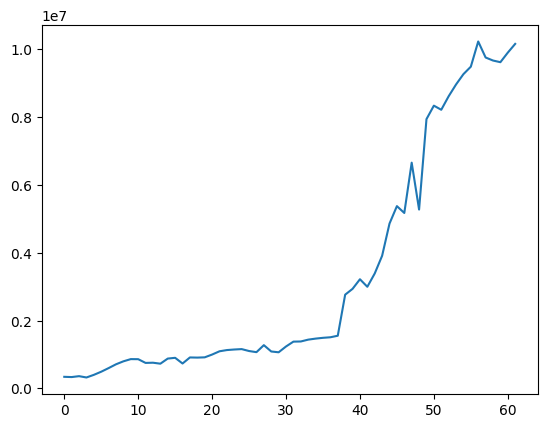

In [5]:
df['Production'].plot()

<Axes: >

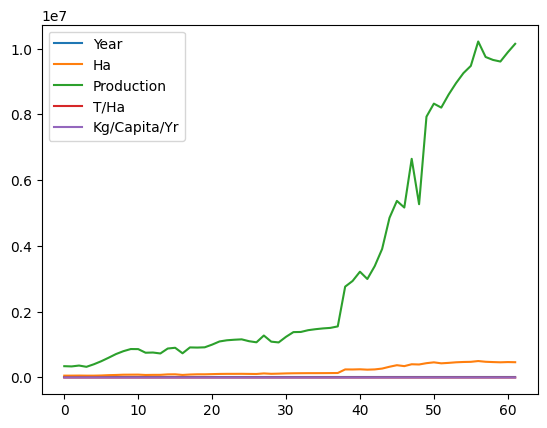

In [6]:
df.plot()

In [7]:
from statsmodels.tsa.stattools import adfuller
test_result=adfuller(df['Production'])
def adfuller_test(Production):
    result=adfuller(Production)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [8]:
adfuller_test(df['Production'])

ADF Test Statistic : -2.50706390332441
p-value : 0.1137650476504608
#Lags Used : 7
Number of Observations Used : 54
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [9]:
df['Production_log']=np.log(df['Production'])

In [10]:
df['Production_log_diff']=df['Production_log'].diff()

In [11]:
adfuller_test(df['Production_log_diff'].dropna())

ADF Test Statistic : -9.022743234879762
p-value : 5.716838432460398e-15
#Lags Used : 0
Number of Observations Used : 60
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<Axes: >

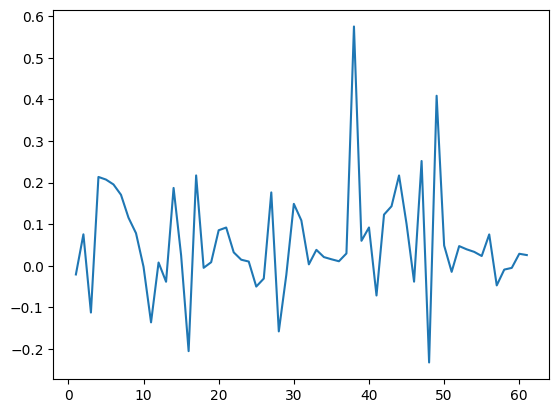

In [12]:
df['Production_log_diff'].plot()

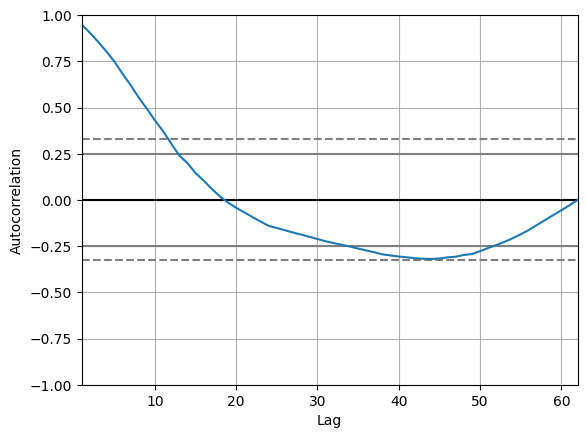

In [13]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Production'])
plt.show()

In [14]:
df.head()

,Year,Ha,Production,T/Ha,Kg/Capita/Yr,Production_log,Production_log_diff
0,1961,55847,343408,6.149086,4.98,12.746675,NaN
1,1962,55847,336296,6.021738,4.70,12.725747,-0.020928
2,1963,57871,362712,6.267595,5.13,12.801364,0.075617
3,1964,55442,324104,5.845821,4.34,12.688820,-0.112545
4,1965,55442,401320,7.238556,5.34,12.902514,0.213695


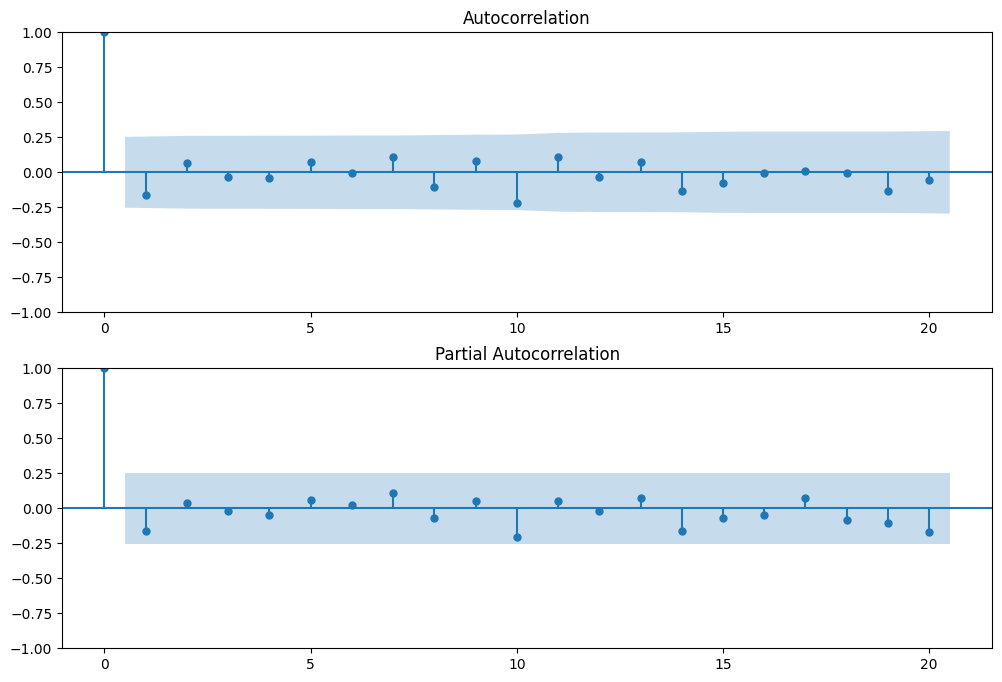

In [15]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Production_log_diff'].iloc[2:],lags=20,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Production_log_diff'].iloc[2:],lags=20,ax=ax2)

In [53]:
model=sm.tsa.statespace.SARIMAX(df['Production'],order=(1, 1, 1),seasonal_order=(1,1,1,2))
results=model.fit()

C:\Users\KHAN GADGET\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\KHAN GADGET\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


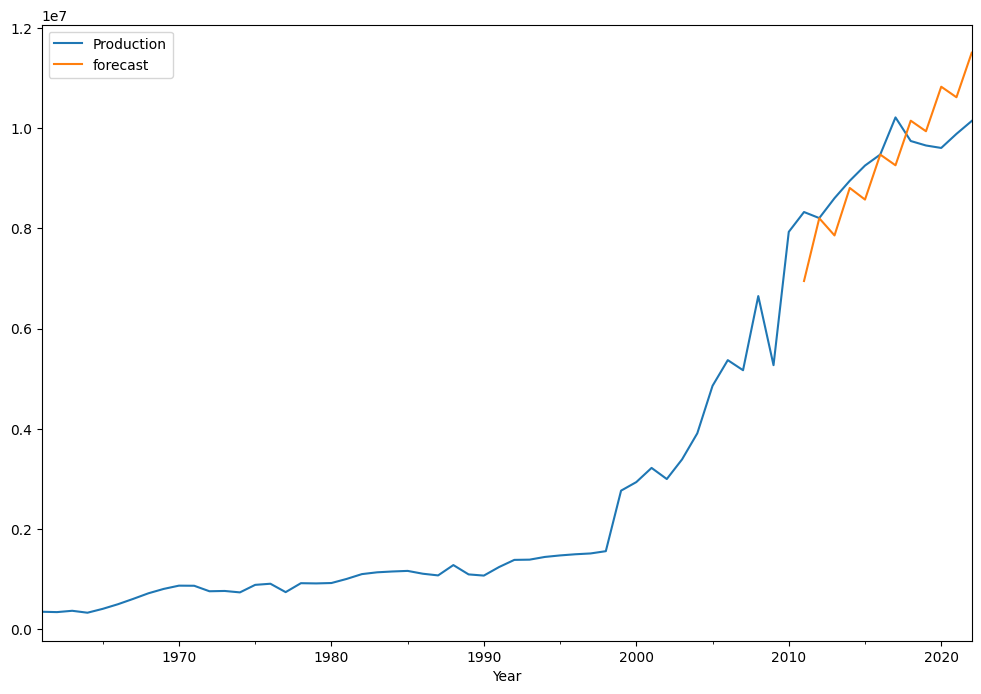

In [59]:
df['forecast']=results.predict(start=50,end=61,dynamic=True)
df[['Production','forecast']].plot(figsize=(12,8))
plt.savefig('image/potato_predit.png')

[Timestamp('2023-01-01 00:00:00'), Timestamp('2024-01-01 00:00:00'), Timestamp('2025-01-01 00:00:00'), Timestamp('2026-01-01 00:00:00'), Timestamp('2027-01-01 00:00:00'), Timestamp('2028-01-01 00:00:00'), Timestamp('2029-01-01 00:00:00'), Timestamp('2030-01-01 00:00:00'), Timestamp('2031-01-01 00:00:00'), Timestamp('2032-01-01 00:00:00')]


C:\Users\KHAN GADGET\AppData\Local\Temp\ipykernel_13084\3832635938.py:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  future_df=pd.concat([df,future_datest_df])


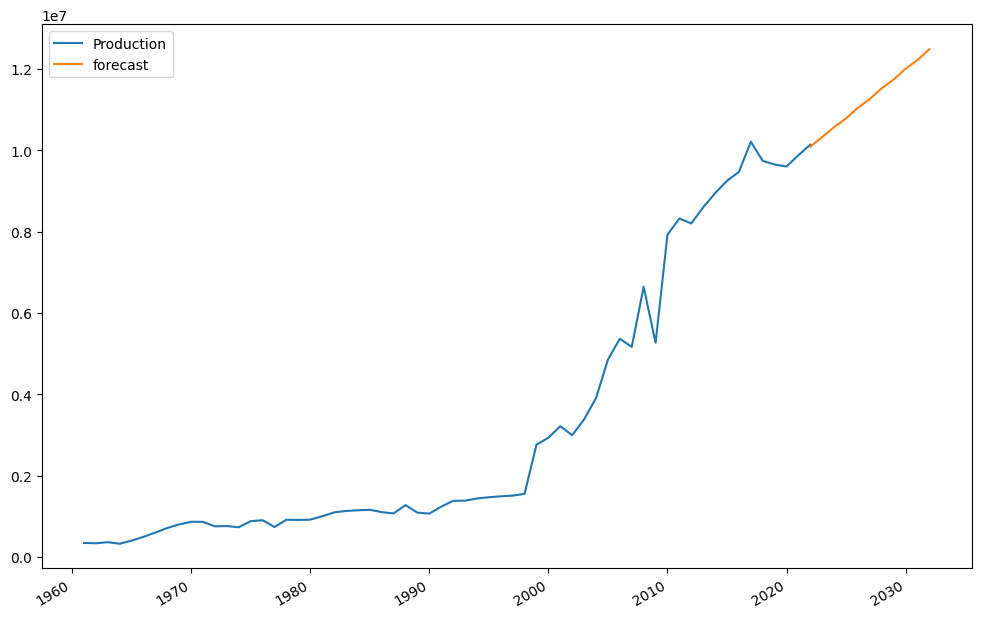

In [60]:
from pandas.tseries.offsets import DateOffset
df.index = pd.to_datetime(df.index, format='%Y')
future_dates = [df.index[-1] + DateOffset(years=x) for x in range(1, 11)]
print(future_dates)
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)
future_df=pd.concat([df,future_datest_df])
future_df['forecast'] = results.predict(start =61, end =71, dynamic= True)  
future_df[['Production', 'forecast']].plot(figsize=(12, 8))
plt.savefig('image/potato_forcast.png')